<a href="https://colab.research.google.com/github/Mik1810/AI-assignment/blob/main/AI_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ta

In [6]:
!pip install yfinance

In [7]:
!pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.5 MB/s eta 0:00:00


In [8]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [9]:
!pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:00


In [10]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.8 MB/s eta 0:00:00


In [11]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np

#Save model in colab drive
from google.colab import drive
drive.mount('/content/gdrive')

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.ticker as mtick
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Financial Data Analysis
import yfinance as yf
import ta
import quantstats as qs

# Machine Learning Metrics
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix

# Models
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Feature Importance
from sklearn.inspection import permutation_importance

# Hyperparameter Tuning
import optuna

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
brk = yf.download('BRK-B')
brk

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-05-09,22.200001,24.400000,22.200001,23.200001,23.200001,4290000
1996-05-10,24.000000,24.200001,23.600000,24.000000,24.000000,1060000
1996-05-13,24.000000,24.100000,23.299999,23.900000,23.900000,700000
1996-05-14,24.000000,24.100000,23.100000,23.600000,23.600000,310000
1996-05-15,23.600000,23.700001,23.000000,23.200001,23.200001,545000
...,...,...,...,...,...,...
2023-12-20,361.519989,361.660004,355.119995,355.350006,355.350006,3926700
2023-12-21,356.019989,357.200012,353.630005,356.140015,356.140015,2851200
2023-12-22,356.500000,358.260010,355.410004,356.470001,356.470001,2332200


In [13]:
# Creating a Candlestick chart for Berkshire Hathaway stocks
candlestick = go.Candlestick(x=brk.index,
                open=brk['Open'],
                high=brk['High'],
                low=brk['Low'],
                close=brk['Adj Close'],
                increasing=dict(line=dict(color='black')),
                decreasing=dict(line=dict(color='red')),
                showlegend=False)

# Layout
layout = go.Layout(
    title='Adjusted Berkshire Hathaway Class B Shares Price - 1996 to 2023',
    yaxis=dict(title='Price (USD)'),
    xaxis=dict(title='Date'),
    template = 'ggplot2',
    xaxis_rangeslider_visible=False,
    yaxis_gridcolor='white',
    xaxis_gridcolor='white',
    yaxis_tickfont=dict(color='black'),
    xaxis_tickfont=dict(color='black'),
    margin=dict(t=50,l=50,r=50,b=50)
)

fig = go.Figure(data=[candlestick], layout=layout)

# Plotting annotation
fig.add_annotation(text='Berkshire Hathaway Class B (BRK-B)',
                    font=dict(color='gray', size=30),
                    xref='paper', yref='paper',
                    x=0.5, y=0.5,
                    showarrow=False,
                    opacity=.85)

fig.show(renderer="colab")

In [14]:
train = brk[brk.index.year <= 2016]
test = brk[brk.index.year >= 2017]

In [15]:
# Visualizing the training set from 1996 to 2016
train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-05-09,22.200001,24.400000,22.200001,23.200001,23.200001,4290000
1996-05-10,24.000000,24.200001,23.600000,24.000000,24.000000,1060000
1996-05-13,24.000000,24.100000,23.299999,23.900000,23.900000,700000
1996-05-14,24.000000,24.100000,23.100000,23.600000,23.600000,310000
1996-05-15,23.600000,23.700001,23.000000,23.200001,23.200001,545000
...,...,...,...,...,...,...
2016-12-23,166.259995,166.440002,164.770004,165.320007,165.320007,2043100
2016-12-27,165.509995,165.820007,164.779999,164.949997,164.949997,2133800
2016-12-28,165.449997,165.639999,163.559998,163.750000,163.750000,2626800


In [16]:
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,164.339996,164.710007,162.440002,163.830002,163.830002,4091000
2017-01-04,164.449997,164.570007,163.000000,164.080002,164.080002,3568900
2017-01-05,164.059998,164.139999,162.179993,163.300003,163.300003,2982500
2017-01-06,163.440002,163.800003,162.639999,163.410004,163.410004,2697000
2017-01-09,163.039993,163.250000,162.020004,162.020004,162.020004,3564700
...,...,...,...,...,...,...
2023-12-20,361.519989,361.660004,355.119995,355.350006,355.350006,3926700
2023-12-21,356.019989,357.200012,353.630005,356.140015,356.140015,2851200
2023-12-22,356.500000,358.260010,355.410004,356.470001,356.470001,2332200


In [17]:
# Defining feature creation function
def feature_engineering(df):

    # Price behavior features
    df['high_low_ratio'] = df['High'] / df['Low']
    df['open_adjclose_ratio'] = df['Open'] / df['Adj Close']
    df['candle_to_wick_ratio'] = (df['Adj Close'] - df['Open']) / (df['High'] - df['Low'])
    df['candle_to_wick_ratio'] = df['candle_to_wick_ratio'].replace([np.inf, -np.inf], 0)

    # Lagged values
    df['Close_lag1'] = df['Adj Close'].shift(1)
    df['Close_lag2'] = df['Adj Close'].shift(2)
    df['Close_lag3'] = df['Adj Close'].shift(3)
    df['Close_lag5'] = df['Adj Close'].shift(5)

    # Close to lags ratio
    df['Close_lag1_ratio'] = df['Adj Close'] / df['Close_lag1']
    df['Close_lag2_ratio'] = df['Adj Close'] / df['Close_lag2']
    df['Close_lag3_ratio'] = df['Adj Close'] / df['Close_lag3']
    df['Close_lag5_ratio'] = df['Adj Close'] / df['Close_lag5']

    # Simple moving averages
    df['sma10'] = ta.trend.sma_indicator(df['Adj Close'], window = 10)
    df['sma20'] = ta.trend.sma_indicator(df['Adj Close'], window = 20)
    df['sma80'] = ta.trend.sma_indicator(df['Adj Close'], window = 80)
    df['sma100'] = ta.trend.sma_indicator(df['Adj Close'], window = 100)

    # Close to averages ratio
    df['Close_sma10_ratio'] = df['Adj Close'] / df['sma10']
    df['Close_sma20_ratio'] = df['Adj Close'] / df['sma20']
    df['Close_sma80_ratio'] = df['Adj Close'] / df['sma80']
    df['Close_sma100_ratio'] = df['Adj Close'] / df['sma100']


    # Shorter SMA to longer SMA ratio
    df['sma10_sma20_ratio'] = df['sma10'] / df['sma20']
    df['sma20_sma80_ratio'] = df['sma20'] / df['sma80']
    df['sma80_sma100_ratio'] = df['sma80'] / df['sma100']
    df['sma10_sma80_ratio'] = df['sma10'] / df['sma80']
    df['sma20_sma100_ratio'] = df['sma20'] / df['sma100']

    # Classical technical indicators
    df['rsi'] = ta.momentum.RSIIndicator(df['Adj Close']).rsi()
    df['rsi_overbought'] = (df['rsi'] >= 70).astype(int)
    df['rsi_oversold'] = (df['rsi'] <= 30).astype(int)
    df['cci'] = ta.trend.cci(df['High'], df['Low'], df['Adj Close'], window=20, constant=0.015)
    df['obv'] = ta.volume.OnBalanceVolumeIndicator(close=df['Adj Close'], volume=df['Volume']).on_balance_volume()
    df['obv_divergence_10_days'] = df['obv'].diff().rolling(10).sum() - df['Adj Close'].diff().rolling(10).sum()
    df['obv_divergence_20_days'] = df['obv'].diff().rolling(20).sum() - df['Adj Close'].diff().rolling(20).sum()

    # Daily returns in %
    df['returns_in_%'] = np.round((df['Adj Close'].pct_change()) * 100, 2)

    # Target variable – Daily returns shifted to a day earlier
    df['target'] = df['returns_in_%'].shift(-1)

    # Remove null values
    df.dropna(inplace = True)
    return df  # Return data frame with the new features above

Si potrebbe pensare di usare, oltre che la media mobile, anche la media mobile esponenziale


In [18]:
# Applying the function above to the train and test sets
train = feature_engineering(train)
test = feature_engineering(test)

In [19]:
train # Visualizing results

,Open,High,Low,Close,Adj Close,Volume,high_low_ratio,open_adjclose_ratio,candle_to_wick_ratio,Close_lag1,...,sma20_sma100_ratio,rsi,rsi_overbought,rsi_oversold,cci,obv,obv_divergence_10_days,obv_divergence_20_days,returns_in_%,target
Date,,,,,,,,,,,,,,,,,,,,,
1996-09-30,21.280001,21.600000,21.280001,21.459999,21.459999,55000,1.015038,0.991612,0.562496,21.360001,...,1.003602,52.451051,0,0,19.657101,3355000,-1.149996e+05,1.299994e+05,0.47,-1.03
1996-10-01,21.459999,21.459999,21.160000,21.240000,21.240000,70000,1.014178,1.010358,-0.733333,21.459999,...,1.005182,46.664615,0,0,-41.256578,3285000,-3.999958e+04,4.499972e+04,-1.03,0.85
1996-10-02,21.200001,21.440001,21.200001,21.420000,21.420000,75000,1.011321,0.989729,0.916665,21.240000,...,1.007388,51.389821,0,0,-27.149134,3360000,1.400001e+05,9.499958e+04,0.85,-0.09
1996-10-03,21.459999,21.459999,21.340000,21.400000,21.400000,40000,1.005623,1.002804,-0.500000,21.420000,...,1.009749,50.850740,0,0,-21.807010,3320000,3.500026e+04,9.999950e+04,-0.09,0.00
1996-10-04,21.360001,21.459999,21.320000,21.400000,21.400000,70000,1.006567,0.998131,0.285708,21.400000,...,1.011643,50.850740,0,0,-39.279503,3390000,6.500034e+04,1.399996e+05,0.00,-0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-22,165.770004,166.119995,164.889999,166.029999,166.029999,2511600,1.007459,0.998434,0.211378,165.949997,...,1.081211,69.999671,0,0,62.915292,600638600,1.351530e+07,1.919479e+07,0.05,-0.43
2016-12-23,166.259995,166.440002,164.770004,165.320007,165.320007,2043100,1.010135,1.005686,-0.562867,166.029999,...,1.082023,66.070528,0,0,54.960756,598595500,7.584300e+06,1.537449e+07,-0.43,-0.22
2016-12-27,165.509995,165.820007,164.779999,164.949997,164.949997,2133800,1.006311,1.003395,-0.538455,165.320007,...,1.083101,64.052697,0,0,43.652107,596461700,-1.309199e+06,1.744499e+07,-0.22,-0.73


In [20]:
X_train = train.drop('target', axis = 1) # Independent features X
y_train = train.target # target variable y

X_test = test.drop('target', axis = 1) # Independent features X
y_test = test.target # target variable y

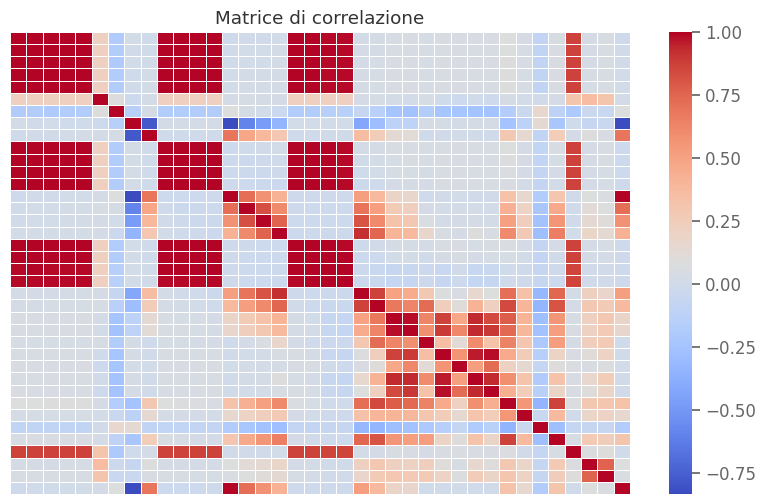

In [21]:
# Calcola i coefficienti di correlazione
correlation_matrix = X_train.corr()

plt.figure()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, xticklabels=False, yticklabels=False)
plt.title('Matrice di correlazione')
plt.show()

In [22]:
# Initiating SelectKBest using f_regression as score function
k_best = SelectKBest(score_func = f_regression, k = 38)

# Fitting and transforming
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

# Obtaining indices and feature names
feature_indices = k_best.get_support(indices = True)
feature_names = X_train.columns[feature_indices]

# Obtaining p-values
p_values = k_best.pvalues_

# Creating features list
features = []

# Selecting only features with p-values below 0.2
for feature, pvalue in zip(feature_names, p_values):
    if pvalue < 0.2:
        features.append(feature)

# Printing features
print("Selected Features:")
print(features)

Selected Features:
['high_low_ratio', 'open_adjclose_ratio', 'Close_lag1_ratio', 'Close_lag5_ratio', 'Close_sma10_ratio', 'Close_sma20_ratio', 'Close_sma80_ratio', 'Close_sma100_ratio', 'sma10_sma20_ratio', 'sma10_sma80_ratio', 'rsi', 'rsi_oversold', 'cci', 'returns_in_%']


In [23]:
# Creating new X datasets containing only the selected features
X_train_kbest = X_train[features]
X_test_kbest = X_test[features]

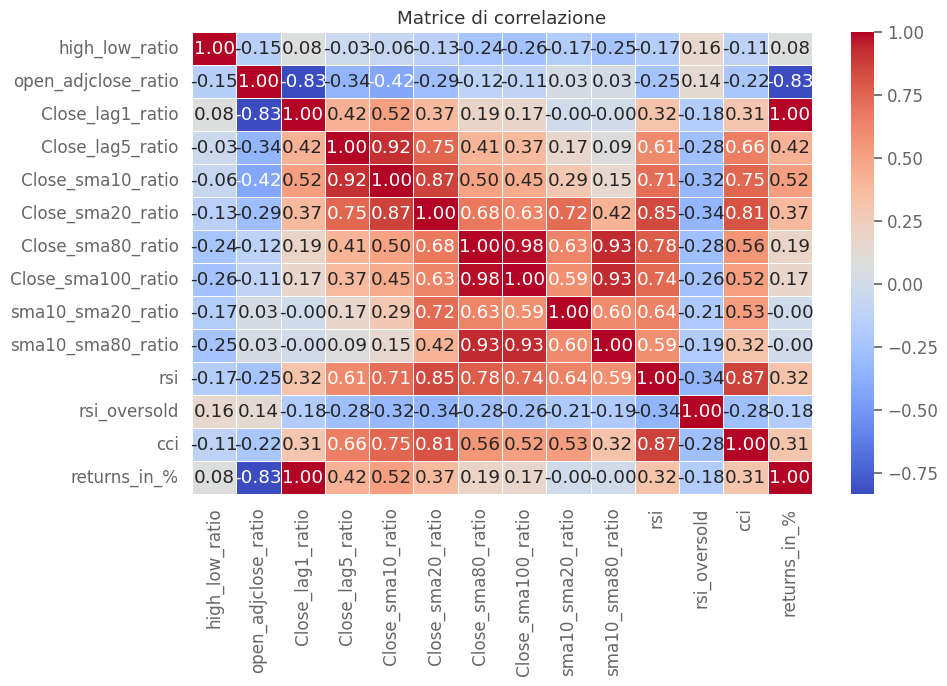

In [24]:
correlation_matrix = X_train_kbest.corr()

plt.figure()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, xticklabels=True, yticklabels=True)
plt.title('Matrice di correlazione')
plt.show()

In [25]:
def spearman_score(X, y):
    _, p_values = spearmanr(X, y)
    return -np.log10(p_values)

In [26]:
X_train_kbest[['Close_lag1_ratio', 'returns_in_%']]

,Close_lag1_ratio,returns_in_%
Date,,
1996-09-30,1.004682,0.47
1996-10-01,0.989748,-1.03
1996-10-02,1.008475,0.85
1996-10-03,0.999066,-0.09
1996-10-04,1.000000,0.00
...,...,...
2016-12-22,1.000482,0.05
2016-12-23,0.995724,-0.43
2016-12-27,0.997762,-0.22


In [27]:
# Best Features
regressors = [
    LinearRegression(),
    Ridge(random_state = 42),
    ExtraTreesRegressor(random_state = 42),
    GradientBoostingRegressor(random_state = 42),
    KNeighborsRegressor(),
    XGBRegressor(random_state = 42),
    LGBMRegressor(random_state = 42),
    CatBoostRegressor(random_state = 42, verbose = False),
    AdaBoostRegressor(random_state = 42),
    RandomForestRegressor(random_state = 42)
]

# Iterating over algorithms and printing scores
for reg in regressors:
    reg.fit(X_train_kbest, y_train)
    y_pred = reg.predict(X_test_kbest)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(f'{type(reg).__name__}: R² = {r2:.2f}, Root Mean Squared Error = {rmse:.2f}')

LinearRegression: R² = -0.01, Root Mean Squared Error = 1.34
Ridge: R² = -0.01, Root Mean Squared Error = 1.34
ExtraTreesRegressor: R² = -0.06, Root Mean Squared Error = 1.37
GradientBoostingRegressor: R² = -0.01, Root Mean Squared Error = 1.34
KNeighborsRegressor: R² = -0.22, Root Mean Squared Error = 1.47
XGBRegressor: R² = -0.20, Root Mean Squared Error = 1.46
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3317
[LightGBM] [Info] Number of data points in the train set: 5098, number of used features: 14
[LightGBM] [Info] Start training from score 0.050294
LGBMRegressor: R² = -0.11, Root Mean Squared Error = 1.41
CatBoostRegressor: R² = -0.06, Root Mean Squared Error = 1.37
AdaBoostRegressor: R² = -0.04, Root Mean Squared Error = 1.36
RandomForestRegressor: R² = -0.06, Root Mean Sq

In [28]:
# All Features
regressors = [
    LinearRegression(),
    Ridge(random_state = 42),
    ExtraTreesRegressor(random_state = 42),
    GradientBoostingRegressor(random_state = 42),
    KNeighborsRegressor(),
    XGBRegressor(random_state = 42),
    LGBMRegressor(random_state = 42),
    CatBoostRegressor(random_state = 42, verbose = False),
    AdaBoostRegressor(random_state = 42),
    RandomForestRegressor(random_state = 42)
]

# Iterating over algorithms and printing scores
for reg in regressors:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(f'{type(reg).__name__}: R² = {r2:.2f}, Root Mean Squared Error = {rmse:.2f}')

LinearRegression: R² = -0.17, Root Mean Squared Error = 1.44
Ridge: R² = -0.22, Root Mean Squared Error = 1.47
ExtraTreesRegressor: R² = -0.11, Root Mean Squared Error = 1.40
GradientBoostingRegressor: R² = 0.01, Root Mean Squared Error = 1.33
KNeighborsRegressor: R² = -0.95, Root Mean Squared Error = 1.86
XGBRegressor: R² = -0.37, Root Mean Squared Error = 1.56
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9184
[LightGBM] [Info] Number of data points in the train set: 5098, number of used features: 38
[LightGBM] [Info] Start training from score 0.050294
LGBMRegressor: R² = -0.14, Root Mean Squared Error = 1.42
CatBoostRegressor: R² = -0.09, Root Mean Squared Error = 1.39
AdaBoostRegressor: R² = -0.01, Root Mean Squared Error = 1.34
RandomForestRegressor: R² = -0.0

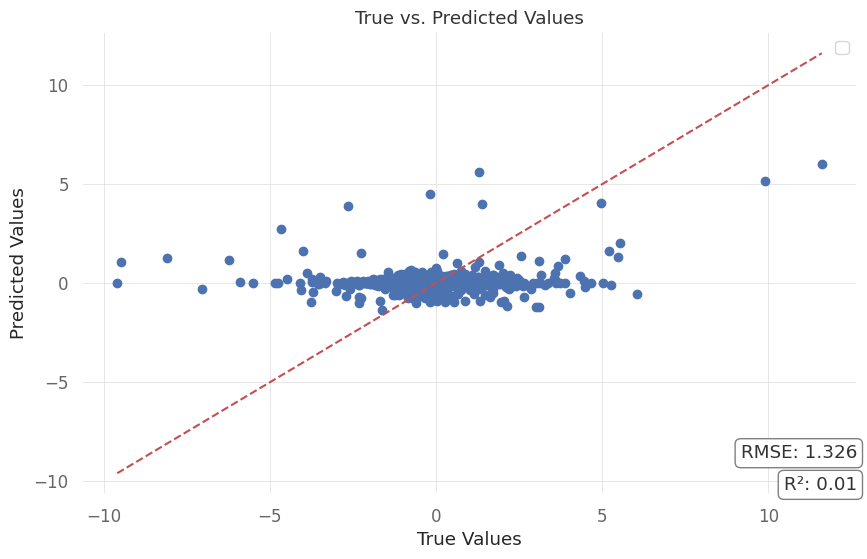

In [29]:
# Instantiating GradientBoostingRegressor model
model = GradientBoostingRegressor(random_state = 42)

# Fitting, testing, and computing scores
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)

# Plotting scatter plot – y_test x y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
box = dict(boxstyle="round, pad=0.3", fc="white", ec="gray", lw=1)
plt.text(plt.xlim()[1], plt.ylim()[0]+0.02, f"R²: {r2:.2f}", ha='right', va='bottom', wrap = True, bbox = box)
plt.text(plt.xlim()[1], plt.ylim()[0]*0.85 + 0.02, f"RMSE: {rmse:.3f}", ha='right', va='bottom', wrap = True, bbox = box)

plt.legend()
plt.show()

In [30]:
# Daily returns plot y_pred x y_test
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='lines', name='True Values'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_pred, mode='lines', name='Predicted Values'))
fig.update_layout(title='True vs. Predicted Values', xaxis_title='Index', yaxis_title='Values')
fig.show(renderer='colab')

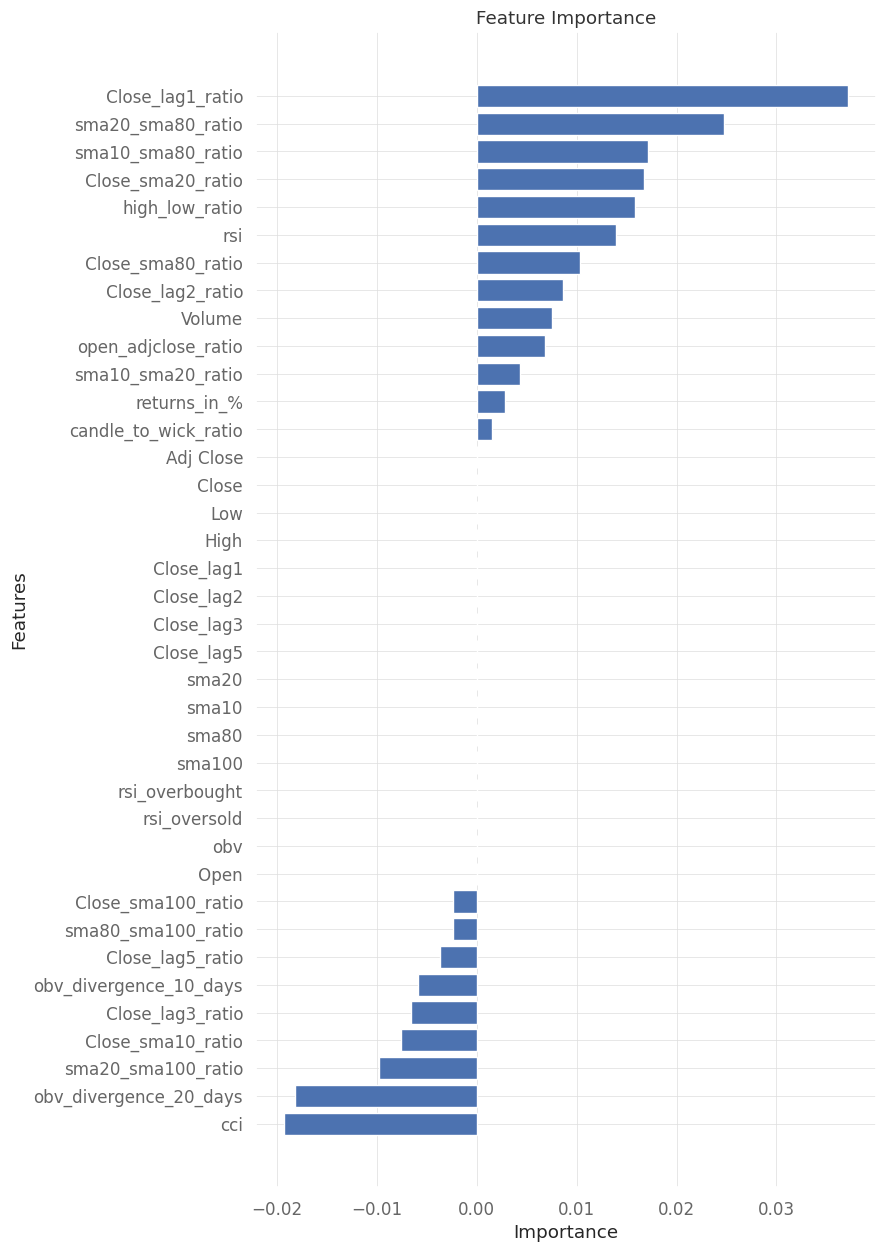

In [31]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42) # Computing feature importance

# Computing mean scores and obtaining features' names
importances = result.importances_mean
feature_names = X_test.columns

# Sorting Features importances and names
indices = importances.argsort()[::1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# Plotting Feature Importance plot
fig, ax = plt.subplots(figsize = (8,15))
ax.barh(sorted_features, sorted_importances)
ax.set_yticklabels(sorted_features)
ax.set_ylabel('Features')
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.show()

In [32]:
# Defining objective function
def objective(trial):

    # Defining different parameter settigns to iterate over
    params = {
        'loss': trial.suggest_categorical('loss', ['squared_error', 'absolute_error', 'huber', 'quantile']),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 20),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'random_state': 42
    }

    # Fitting and predicting
    tuning = GradientBoostingRegressor(**params)
    tuning.fit(X_train, y_train)
    preds = tuning.predict(X_test)

    # Computing RMSE score
    rmse = np.round(mean_squared_error(y_test, preds, squared = False), 3)
    return rmse # Returining the score

In [33]:
study = optuna.create_study(direction = 'minimize') # Creating study
study.optimize(objective, n_trials = 100, show_progress_bar = True) # Running study

[I 2023-12-28 12:18:10,722] A new study created in memory with name: no-name-b2739f5f-c9a2-465c-89da-892395349e4f


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-12-28 12:18:12,971] Trial 0 finished with value: 2.335 and parameters: {'loss': 'quantile', 'n_estimators': 100, 'learning_rate': 0.09242608030585366, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 20, 'subsample': 0.153053092015471}. Best is trial 0 with value: 2.335.
[I 2023-12-28 12:18:19,326] Trial 1 finished with value: 1.363 and parameters: {'loss': 'squared_error', 'n_estimators': 250, 'learning_rate': 0.04566639800414602, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 14, 'subsample': 0.20589017625191064}. Best is trial 1 with value: 1.363.
[I 2023-12-28 12:18:43,803] Trial 2 finished with value: 1.344 and parameters: {'loss': 'squared_error', 'n_estimators': 200, 'learning_rate': 0.022686709761011076, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 3, 'subsample': 0.718474350241815}. Best is trial 2 with value: 1.344.
[I 2023-12-28 12:18:52,852] Trial 3 finished with value: 1.343 and parameters: {'loss': 'squared_error', 'n_estim

In [34]:
print('Best parameters:', study.best_params) # Printing the best parameters setting
print('Best score:', study.best_value) # Printing the lowest RMSE score found

Best parameters: {'loss': 'squared_error', 'n_estimators': 300, 'learning_rate': 0.010009382079213388, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 3, 'subsample': 0.9618897956210399}
Best score: 1.316


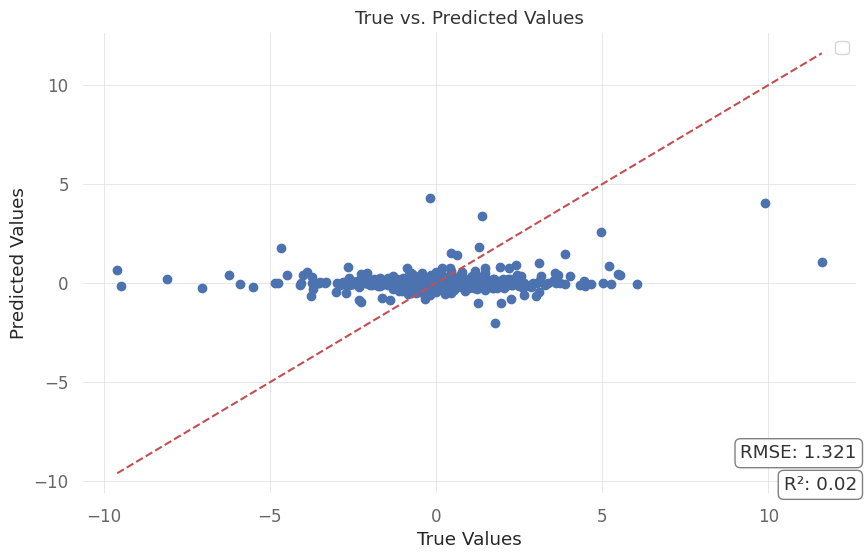

In [35]:
# Instantiating model with the best parameters settings
model = GradientBoostingRegressor(**study.best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)

# Plotting scatter plot – y_test x y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
box = dict(boxstyle="round, pad=0.3", fc="white", ec="gray", lw=1)
plt.text(plt.xlim()[1], plt.ylim()[0]+0.02, f"R²: {r2:.2f}", ha='right', va='bottom', wrap = True, bbox = box)
plt.text(plt.xlim()[1], plt.ylim()[0]*0.85 + 0.02, f"RMSE: {rmse:.3f}", ha='right', va='bottom', wrap = True, bbox = box)

plt.legend()
plt.show()

In [36]:
# Daily returns plot y_pred x y_test
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='lines', name='True Values'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_pred, mode='lines', name='Predicted Values'))
fig.update_layout(title='True vs. Predicted Values', xaxis_title='Index', yaxis_title='Values')
fig.show(renderer='colab')

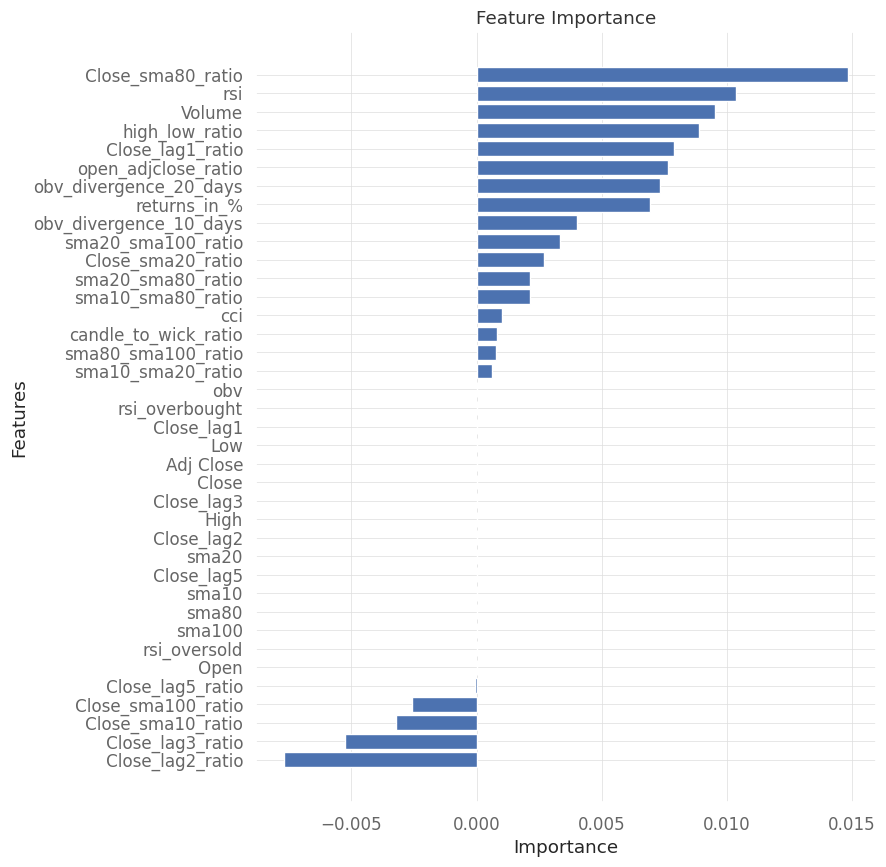

In [37]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42) # Obtaining permutation importance

importances = result.importances_mean
feature_names = X_test.columns

indices = importances.argsort()[::1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

fig, ax = plt.subplots(figsize = (8,10))
ax.barh(sorted_features, sorted_importances)
ax.set_yticklabels(sorted_features)
ax.set_ylabel('Features')
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.show()

In [61]:
y_pred[:100] # Displaying y_pred values

array([ 0.02656683,  0.02440963,  0.02290066,  0.02436432,  0.02440963,
        0.02587329,  0.02290066,  0.02290066,  0.02290066,  0.02587329,
        0.0815771 ,  0.06135018,  0.02890021,  0.02152428,  0.02405714,
        0.0255208 ,  0.02556611,  0.02442539,  0.02290066,  0.04571096,
        0.05558287,  0.03306369,  0.03265137,  0.01888092,  0.01216513,
        0.03803503,  0.00892866,  0.01524719,  0.01850506,  0.01672073,
        0.00893878,  0.00893878,  0.00893878,  0.00893878,  0.00893878,
        0.01518734,  0.01518734,  0.05120909,  0.01983565,  0.01983565,
        0.01832668,  0.01983565,  0.01983565,  0.01983565,  0.01983565,
        0.04599402,  0.05862453,  0.04985354,  0.05684507, -0.06713759,
       -0.02001804, -0.01730939,  0.04041058,  0.02290066,  0.02290066,
        0.02440963,  0.02440963,  0.02556611,  0.02436432,  0.02290066,
        0.02440963,  0.06249343,  0.02556611,  0.02442539,  0.02290066,
        0.02440963,  0.02290066,  0.02440963,  0.02702977,  0.02

In [39]:
y_test # Displaying y_test values

Date
2017-05-25    0.24
2017-05-26   -0.35
2017-05-30    0.10
2017-05-31    0.83
2017-06-01   -0.22
              ... 
2023-12-19   -1.78
2023-12-20    0.22
2023-12-21    0.09
2023-12-22    0.10
2023-12-26    0.03
Name: target, Length: 1658, dtype: float64

In [40]:
# Creating class array based on predicted returns
y_pred_class = np.where(y_pred > 0, 1, 0)
y_pred_class

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
# Creating class array based on actual returns
y_test_class = np.where(y_test > 0, 1, 0)
y_test_class

array([1, 0, 1, ..., 1, 1, 1])

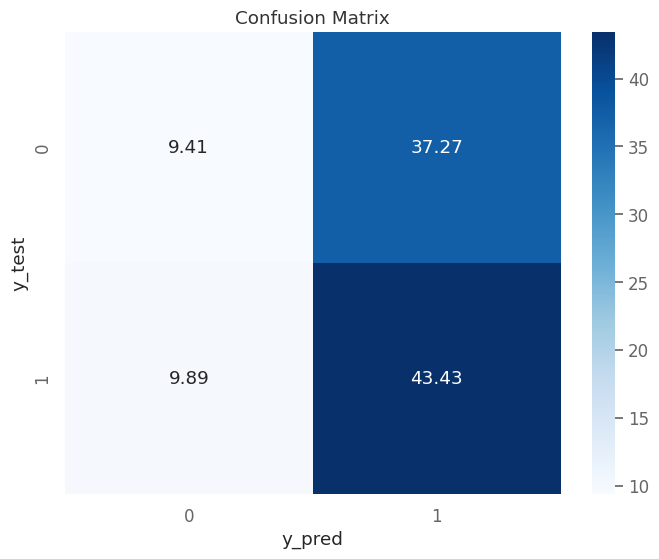

In [42]:
# Computing confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Transforming values to %
conf_matrix = conf_matrix / np.sum(conf_matrix) * 100

# Plotting conf matrix
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues',
           fmt = '.2f')

plt.title('Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [66]:
X_test['sign'] = y_pred_class # Creating 'sign' variable, indicating the following day's direction
X_test['current_position'] = X_test['sign'].shift(1) # Current position
X_test['model_returns'] = X_test['current_position'] * X_test['returns_in_%'] # Model returns

In [44]:
X_test

,Open,High,Low,Close,Adj Close,Volume,high_low_ratio,open_adjclose_ratio,candle_to_wick_ratio,Close_lag1,...,rsi_overbought,rsi_oversold,cci,obv,obv_divergence_10_days,obv_divergence_20_days,returns_in_%,sign,current_position,model_returns
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-25,165.229996,165.500000,164.710007,165.300003,165.300003,2605300,1.004796,0.999576,0.088618,164.929993,...,0,0,33.562087,4303000,1.484050e+07,1.157620e+07,0.22,1,NaN,NaN
2017-05-26,165.250000,165.880005,165.020004,165.690002,165.690002,2156300,1.005211,0.997344,0.511630,165.300003,...,0,0,51.977824,6459300,1.340450e+07,1.677750e+07,0.24,1,1.0,0.24
2017-05-30,165.789993,165.869995,164.470001,165.110001,165.110001,3048300,1.008512,1.004118,-0.485711,165.690002,...,0,0,34.434969,3411000,7.397199e+06,1.059380e+07,-0.35,1,1.0,-0.35
2017-05-31,165.270004,165.449997,164.100006,165.279999,165.279999,5674900,1.008227,0.999940,0.007403,165.110001,...,0,0,26.785716,9085900,1.550700e+07,1.348750e+07,0.10,1,1.0,0.10
2017-06-01,165.800003,166.690002,164.750000,166.660004,166.660004,3330900,1.011775,0.994840,0.443299,165.279999,...,0,0,88.538344,12416800,2.363529e+07,1.383620e+07,0.83,1,1.0,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-19,360.149994,362.549988,359.089996,361.799988,361.799988,3084600,1.009635,0.995439,0.476878,359.649994,...,0,0,71.534611,200375400,6.030293e+06,-8.384700e+06,0.60,1,1.0,0.60
2023-12-20,361.519989,361.660004,355.119995,355.350006,355.350006,3926700,1.018416,1.017363,-0.943421,361.799988,...,0,0,-17.964016,196448700,5.142697e+06,-9.392594e+06,-1.78,1,1.0,-1.78
2023-12-21,356.019989,357.200012,353.630005,356.140015,356.140015,2851200,1.010095,0.999663,0.033621,355.350006,...,0,0,-55.915292,199299900,5.163897e+06,-8.651594e+06,0.22,1,1.0,0.22


[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2017-05-30   2017-05-30
End Period                 2023-12-26   2023-12-26
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       81.0%

Cumulative Return          115.84%      102.45%
CAGR﹪                     8.41%        7.68%

Sharpe                     0.66         0.69
Prob. Sharpe Ratio         95.39%       96.21%
Smart Sharpe               0.57         0.6
Sortino                    0.95         1.01
Smart Sortino              0.82         0.88
Sortino/√2                 0.67         0.72
Smart Sortino/√2           0.58         0.62
Omega                      1.16         1.16

Max Drawdown               -29.55%      -25.13%
Longest DD Days            494          666
Volatility (ann.)          21.17%       17.89%
R^2                        0.71         0.71
Information Ratio          -0.01        -0.

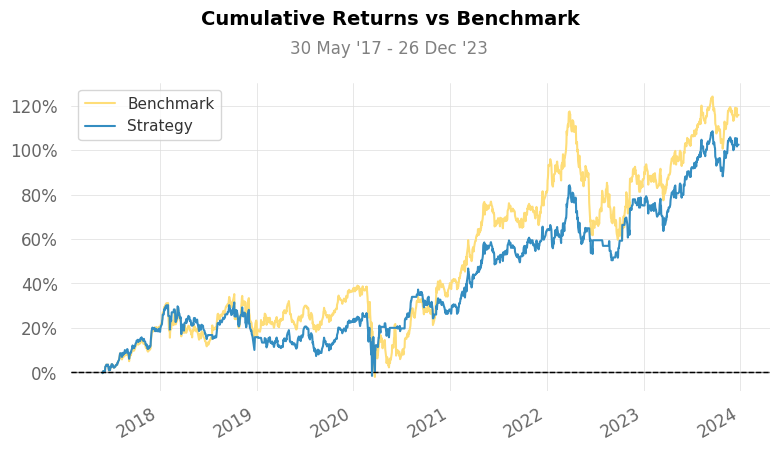

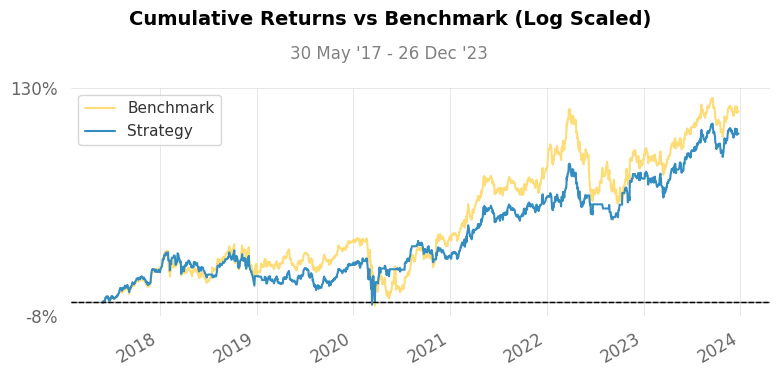

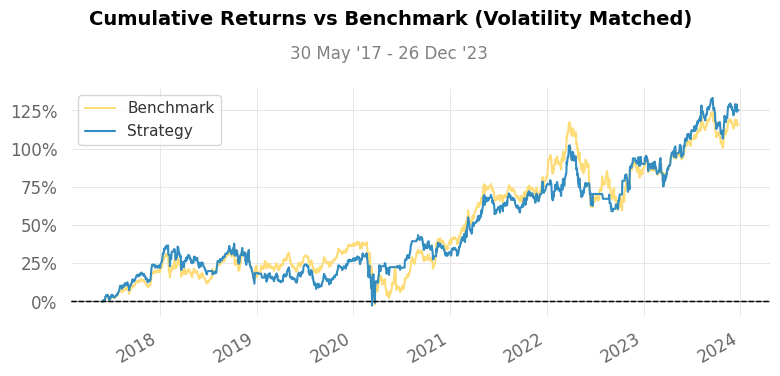

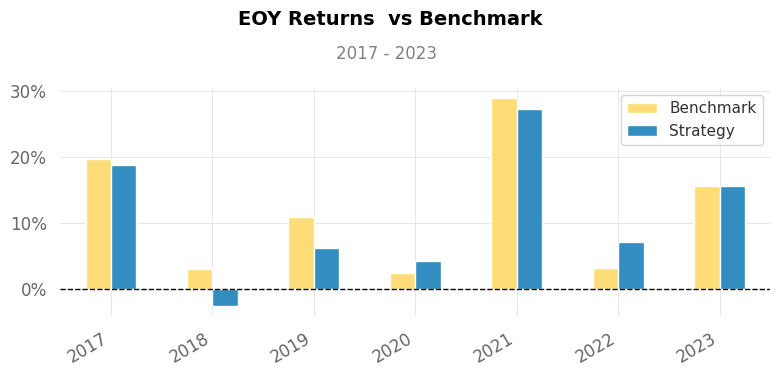

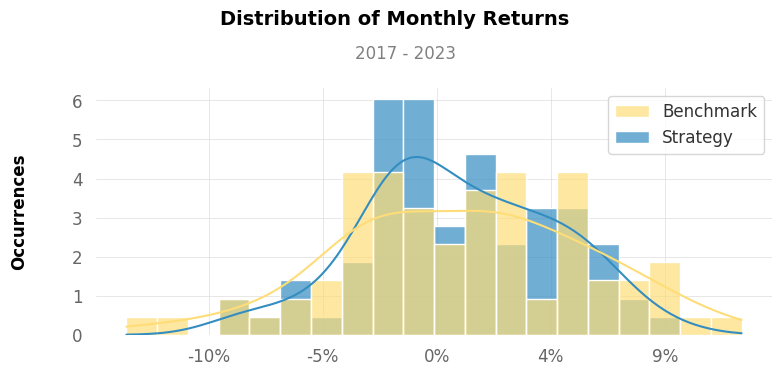

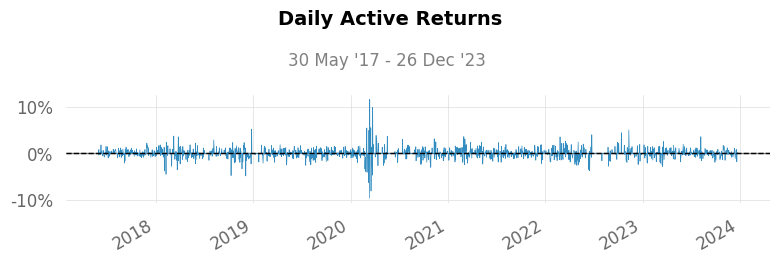

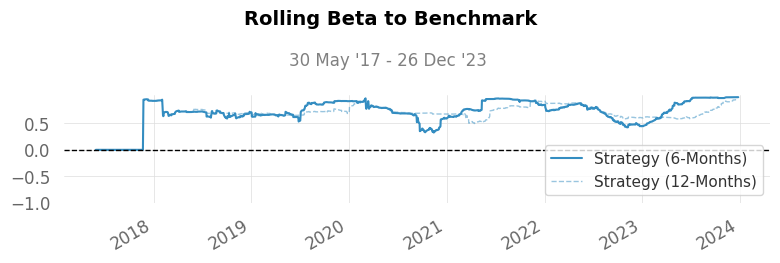

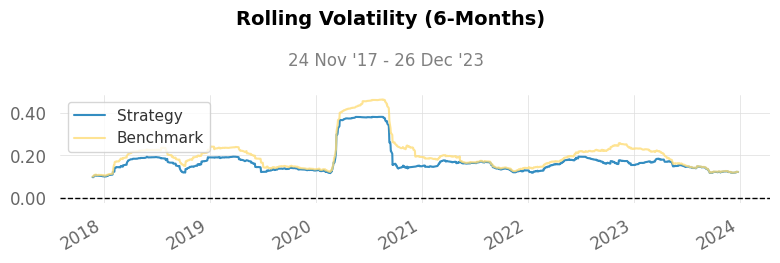

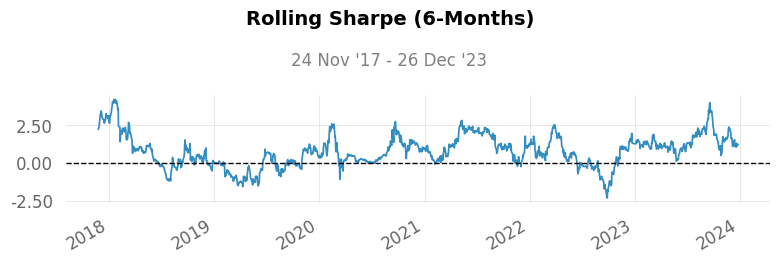

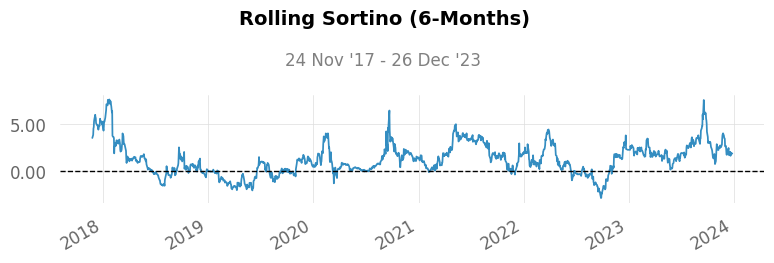

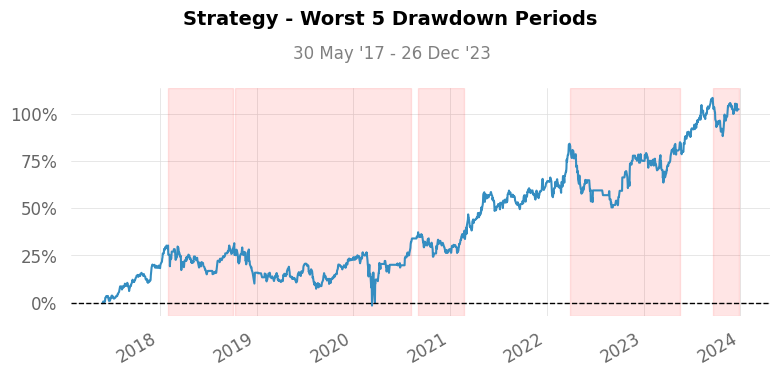

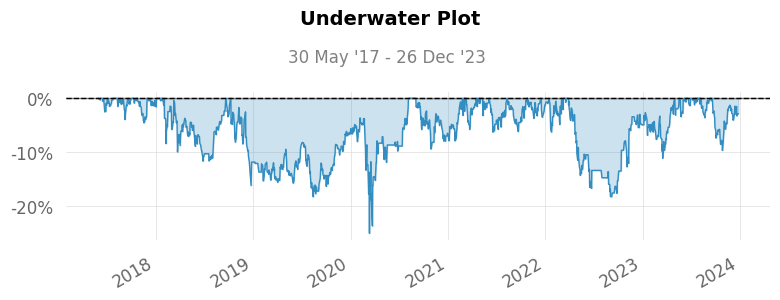

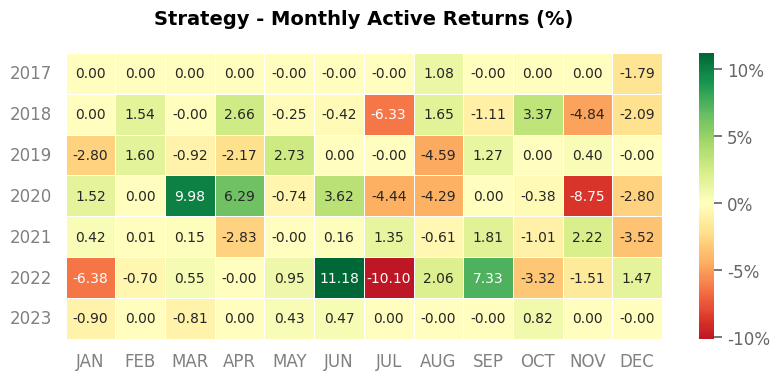

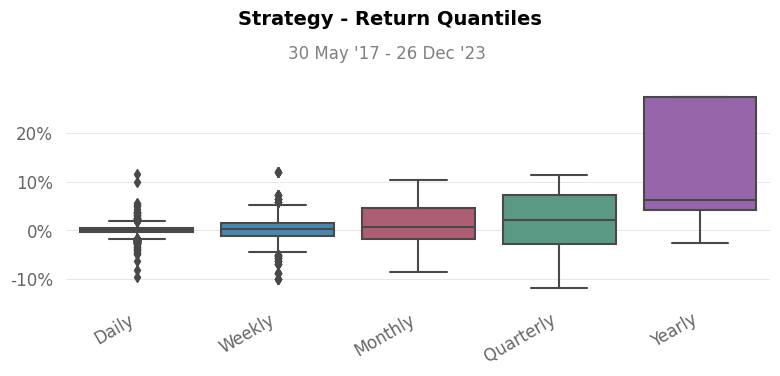

In [45]:
# Converting % values to decimal values
model_returns = X_test['model_returns'] / 100
buy_and_hold = X_test['returns_in_%'] / 100

# Generating full report on the model strategy and comparing it to a Buy & Hold approach
qs.reports.full(model_returns, benchmark = buy_and_hold)

In [64]:
import joblib

# Salva il modello su Colab
joblib.dump(model, 'modello_regression.pkl')

# Scarica il modello
from google.colab import files
files.download('modello_regression.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
# Carica il modello precedentemente salvato
model_caricato = joblib.load('modello_regression.pkl')

#Elimino le colonne non presenti durante l'allenamento
colonne_da_elim = ['current_position', 'model_returns', 'sign']
X_test = X_test.drop(columns=colonne_da_elim)


y_pred2 = model_caricato.predict(X_test)

In [69]:
y_pred2[:100]

array([ 0.02656683,  0.02440963,  0.02290066,  0.02436432,  0.02440963,
        0.02587329,  0.02290066,  0.02290066,  0.02290066,  0.02587329,
        0.0815771 ,  0.06135018,  0.02890021,  0.02152428,  0.02405714,
        0.0255208 ,  0.02556611,  0.02442539,  0.02290066,  0.04571096,
        0.05558287,  0.03306369,  0.03265137,  0.01888092,  0.01216513,
        0.03803503,  0.00892866,  0.01524719,  0.01850506,  0.01672073,
        0.00893878,  0.00893878,  0.00893878,  0.00893878,  0.00893878,
        0.01518734,  0.01518734,  0.05120909,  0.01983565,  0.01983565,
        0.01832668,  0.01983565,  0.01983565,  0.01983565,  0.01983565,
        0.04599402,  0.05862453,  0.04985354,  0.05684507, -0.06713759,
       -0.02001804, -0.01730939,  0.04041058,  0.02290066,  0.02290066,
        0.02440963,  0.02440963,  0.02556611,  0.02436432,  0.02290066,
        0.02440963,  0.06249343,  0.02556611,  0.02442539,  0.02290066,
        0.02440963,  0.02290066,  0.02440963,  0.02702977,  0.02

In [80]:
y_test.index


DatetimeIndex(['2017-05-25', '2017-05-26', '2017-05-30', '2017-05-31',
               '2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08',
               ...
               '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-15',
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-26'],
              dtype='datetime64[ns]', name='Date', length=1658, freq=None)

In [84]:
# Creating class array based on predicted returns
y_pred_class = np.where(y_pred > 0, 1, 0)
y_pred_class


# Creating class array based on actual returns
y_test_class = np.where(y_test > 0, 1, 0)
y_test_class

df_combinato = pd.DataFrame({
    'data': y_test.index,
    'test': y_test_class,
    'pred' : y_pred_class
})

df_combinato

,data,test,pred
0,2017-05-25,1,1
1,2017-05-26,0,1
2,2017-05-30,1,1
3,2017-05-31,1,1
4,2017-06-01,0,1
...,...,...,...
1653,2023-12-19,0,1
1654,2023-12-20,1,1
1655,2023-12-21,1,1
1656,2023-12-22,1,1
